In [4]:
from google.colab import files
uploaded=files.upload()


Saving wind_turbine_condition_dataset.csv to wind_turbine_condition_dataset.csv


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = pd.read_csv('wind_turbine_condition_dataset.csv')

df.fillna(0, inplace=True)

df.isnull().any().sum()
df.head(2)

,Wind Speed (m/s),Rotor Speed (RPM),Generator Temperature (C),Vibration Levels (mm/s)
0,11.239883,10.628584,74.942215,0.172354
1,23.915715,22.728208,35.889798,0.843896


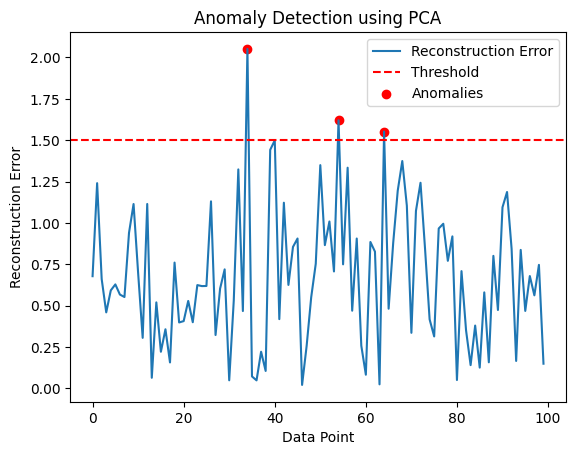

In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)


n_components = 1
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(normalized_data)


reconstructed_data = pca.inverse_transform(principal_components)
reconstruction_error = np.mean(np.square(normalized_data - reconstructed_data), axis=1)


threshold = 1.5

# Find anomalies
anomalies = np.where(reconstruction_error > threshold)[0]


plt.figure()
plt.plot(reconstruction_error, label='Reconstruction Error')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.scatter(anomalies, reconstruction_error[anomalies], color='red', label='Anomalies')
plt.xlabel('Data Point')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.title('Anomaly Detection using PCA')
plt.show()
